In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
from PIL import Image

In [3]:
import math

In [4]:
dataDir = "data/tiny_set/erase_with_uncertain_dataset"

In [5]:
annFile = 'data/tiny_set/erase_with_uncertain_dataset/annotations/corner/task/tiny_set_train_sw640_sh512_all.json'

In [6]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


In [44]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
none


In [45]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds();

In [46]:
len(imgIds)

8256

In [71]:
imgIds = coco.getImgIds(imgIds = [6])
img = coco.loadImgs(imgIds)[0]

In [72]:
I = Image.open(f"{dataDir}/train/{img['file_name']}").convert('RGB')

In [73]:
I = I.crop(img['corner'])

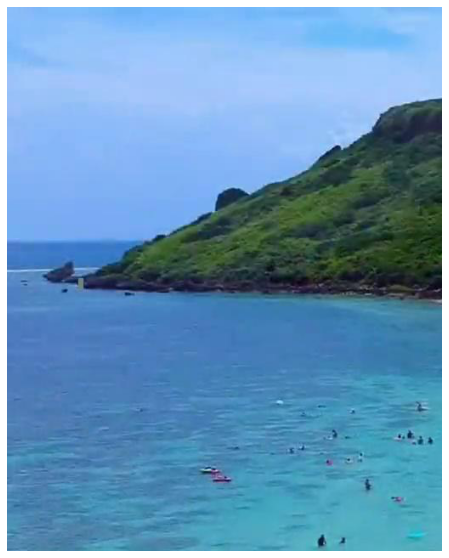

In [74]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
plt.axis('off')
plt.imshow(I)
plt.show()

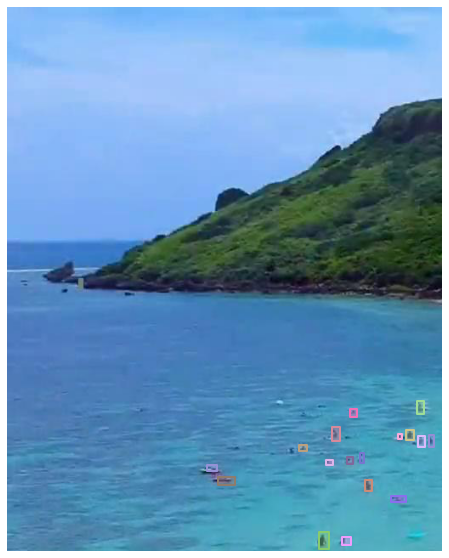

In [75]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'])
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [76]:
anns

[{'segmentation': [[382.01409912109375,
    494.132568359375,
    382.01409912109375,
    510.16654205322266,
    390.8900489807129,
    510.16654205322266,
    390.8900489807129,
    494.132568359375]],
  'bbox': [382.01409912109375,
   494.132568359375,
   8.87594985961914,
   16.033973693847656],
  'category_id': 1,
  'area': 142.3167465570441,
  'iscrowd': 0,
  'image_id': 6,
  'id': 2,
  'ignore': False,
  'uncertain': False,
  'logo': False,
  'in_dense_image': False,
  'size': 11.92965827494837},
 {'segmentation': [[420.381103515625,
    556.2642211914062,
    420.381103515625,
    568.862343788147,
    429.25705337524414,
    568.862343788147,
    429.25705337524414,
    556.2642211914062]],
  'bbox': [420.381103515625,
   556.2642211914062,
   8.87594985961914,
   12.598122596740723],
  'category_id': 1,
  'area': 111.82030449400554,
  'iscrowd': 0,
  'image_id': 6,
  'id': 3,
  'ignore': False,
  'uncertain': False,
  'logo': False,
  'in_dense_image': False,
  'size': 10.574

In [10]:
ann_ids = coco.getAnnIds()

In [11]:
anns = coco.loadAnns(ann_ids)

In [16]:
objs = np.array(list(map(lambda x: x['image_id'], anns)))

In [19]:
vals, count = np.unique(objs, return_counts=True)

<BarContainer object of 3206 artists>

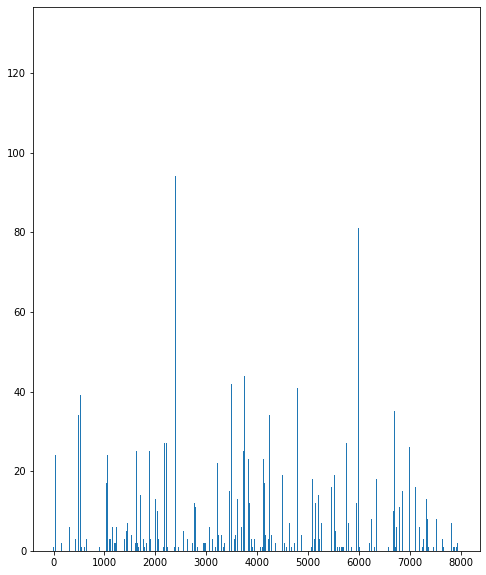

In [20]:
plt.bar(vals, count)

In [11]:
heights = []
widths = []
for i in coco.imgs:
    img = coco.imgs[i]
    heights.append(img['height'])
    widths.append(img['width'])

In [13]:
from scipy import stats

In [14]:
stats.describe(heights)

DescribeResult(nobs=8256, minmax=(497, 640), mean=600.3820251937984, variance=3501.1039482178994, skewness=-0.82404672574433, kurtosis=-1.3205461608428917)

In [15]:
stats.describe(widths)

DescribeResult(nobs=8256, minmax=(512, 640), mean=551.5658914728682, variance=3499.3982017006365, skewness=0.8261446891807805, kurtosis=-1.3174849525383916)